In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import re
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [3]:
df_true=pd.read_csv('True.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake (1).csv


In [9]:
df_fake=pd.read_csv('Fake (1).csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
#There are 21417 records for true data

df_true.describe(include='all')

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [11]:
#There are 23481 records for fake data

df_fake.describe(include='all')

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [12]:
#checking for null values in both datasets

df_fake.isnull()
df_true.isnull()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
21412,False,False,False,False
21413,False,False,False,False
21414,False,False,False,False
21415,False,False,False,False


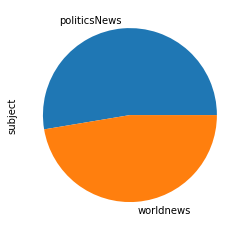

In [13]:
#Visualizing the distibution of true news by subject of news

df_true['subject'].value_counts().plot(kind='pie')

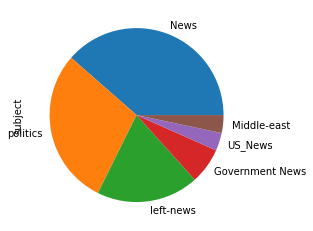

In [15]:
#Visualizing the distibution of fake news by subject of news

df_fake['subject'].value_counts().plot(kind='pie')

In [16]:
#We want to merge both dataframes and in order to do so, we must label data as binary values

df_fake['label'] = 1
df_true['label'] = 0

In [17]:
data = pd.concat([df_true,df_fake],axis=0,ignore_index=True)
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [18]:
#checking if all attributes and records are accounted for

data.shape

(44898, 5)

#performing modifications on data , hence create copy of merged dataset

X=data
y = X['label']
X = X.drop('label',axis = 1)

datafull.isnull().sum()

# DATA CLEANING

def cleaning_data(row):
    
    #convert all text to lowercase
    row=row.lower()
    
    #remove all numbers and special chars from text
    rwo=re.sub('[^a-zA-Z]',' ',row)
    
    #split data and tokenize
    token=re.split()
    
    #lemmatize each work into its base form(stays,stayed becomes stay), remove stop words like a,an,the that occur repetitively but are useless
    news=[ps.lemmatize(word) for word in token if not word in stopwords]
    
    #join all tokens with space
    cleaned_news=' '.join(news)
    
    #return cleaned data
    return cleaned_news

# TRAIN MODEL

from sklearn.model_selection import train_test_split
labels=data.label
#split dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

from sklearn.feature_extraction.text import TfidfVectorizer
#calculate product of term frequency and inverse document frequency
vectorizer=TfidfVectorizer(max_features=50000,lowercase=False,ngram_range=(1,2))

#fit vectorizer in test and training data
vec_train_data=vectorizer.fit_transform(train)
vec_train_data=vec_train_data.toarray()
vec_test_data=vectorizer.transform(test).toarray()


#Use the multinomial naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(train,trainlabel)
y_pred=clf.predict(test)

In [19]:
#split dataset
labels=data.label
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.2, random_state=7)

In [20]:
# TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)


In [22]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
 Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
print(y_pred)

Accuracy: 99.49%
[1 0 0 ... 0 0 0]


In [23]:
print(confusion_matrix(y_test,y_pred, labels=[1,0]))

[[4650   25]
 [  21 4284]]


In [24]:
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm

lr = LogisticRegression()
lr.fit(tfidf_train,y_train)
lr_pred = lr.predict(tfidf_test)

print(lr_pred)
print(accuracy_score(y_test, lr_pred))

[1 0 0 ... 0 0 0]
0.9854120267260579


In [59]:
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm

rf = RandomForestClassifier(n_estimators=100,max_depth = 3)
rf.fit(tfidf_train,y_train)
rf_pred = rf.predict(tfidf_test)

print(rf_pred)
print(accuracy_score(y_test, rf_pred))

[1 0 0 ... 0 1 1]
0.7934298440979956


In [56]:
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm

rf = RandomForestClassifier(n_estimators=100,max_depth = 10)
rf.fit(tfidf_train,y_train)
rf_pred1 = rf.predict(tfidf_test)

print(rf_pred1)
print(accuracy_score(y_test, rf_pred1))

[1 0 0 ... 0 0 0]
0.9692650334075724


In [52]:
#Plot for Passive Aggressive Classifier since it has the highest accuracy
padf=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dfpa=padf.head(25)
dfpa

,Actual,Predicted
25168,1,1
5096,0,0
3123,0,0
37809,1,1
27507,1,1
11849,0,0
44779,1,1
41749,1,1
16278,0,0
41119,1,1


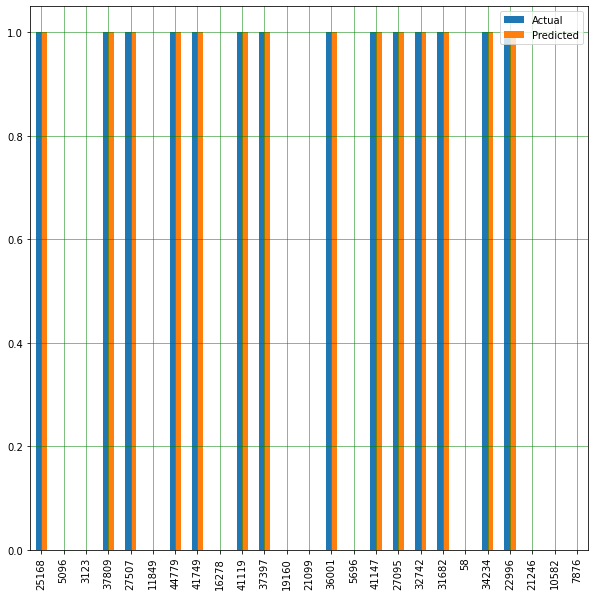

In [53]:
dfpa.plot(kind='bar',figsize=(10,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle='-',linewidth='0.5',color='orange')
plt.show()

In [60]:
#Plot for Passive Aggressive Classifier since it has the highest accuracy
rfdf=pd.DataFrame({'Actual':y_test,'Predicted':rf_pred})
dfrf=rfdf.head(25)
dfrf

,Actual,Predicted
25168,1,1
5096,0,0
3123,0,0
37809,1,1
27507,1,1
11849,0,1
44779,1,1
41749,1,1
16278,0,1
41119,1,1


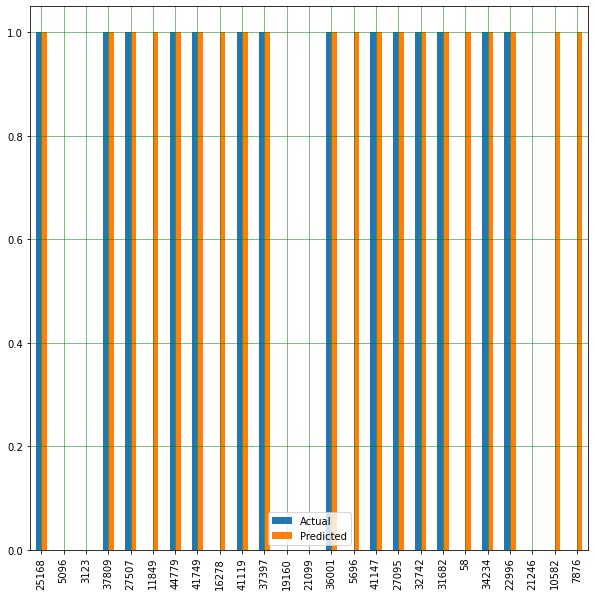

In [61]:
dfrf.plot(kind='bar',figsize=(10,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle='-',linewidth='0.5',color='orange')
plt.show()